In [31]:

import random
import matplotlib.pyplot as plt
import timeit

def generate_maze_recursive_backtracking(aX_size, aY_size):
    aWalls = [[[1,1,1,1] for _ in range(aX_size)] for _ in range(aY_size)]
    aVisited_nodes = [[False for _ in range(aX_size)] for _ in range(aY_size)]
    path = [(0,0)]
    aVisited_nodes[0][0] = True

    while path:
        x, y = path[-1]
        possible_directions = []
        if x > 0 and not aVisited_nodes[y][x-1]:
            possible_directions.append((-1, 0, 0, 2))
        if x < aX_size-1 and not aVisited_nodes[y][x+1]:
            possible_directions.append((1, 0, 2, 0))
        if y > 0 and not aVisited_nodes[y-1][x]:
            possible_directions.append((0, -1, 1, 3))   
        if y < aY_size-1 and not aVisited_nodes[y+1][x]:
            possible_directions.append((0, 1, 3, 1))    

        if possible_directions:
            dx, dy, w1, w2 = random.choice(possible_directions)
            nx, ny = x+dx, y+dy
            aWalls[y][x][w1] = 0
            aWalls[ny][nx][w2] = 0
            aVisited_nodes[ny][nx] = True
            path.append((nx, ny))
        else:
            path.pop()
    return aWalls


def draw_maze(aWalls):
    fig, ax = plt.subplots() 
    aY_size = len(aWalls[0])
    aX_size = len(aWalls)
    for y in range(aY_size):
        for x in range(aX_size):
            left, top, right, bottom = aWalls[y][x]
            x0, x1 = x, x+1
            y0, y1 = aY_size - y, aY_size - (y+1)

            if top: ax.plot([x0, x1], [y0, y0], color="black")
            if right: ax.plot([x1, x1], [y0, y1], color="black")
            if bottom: ax.plot([x0, x1], [y1, y1], color="black")
            if left: ax.plot([x0, x0], [y0, y1], color="black")
    ax.set_aspect("equal")
    ax.axis("off")
    plt.title("Prázdné bludiště generované metodou rekurzivního backtrackingu (DFS)")
    #scatter - pridani bodu
    ax.scatter(0.5,aY_size - 0.5, color = 'hotpink')
    ax.scatter(aX_size - 0.5, 0.5, color = 'green')
    plt.show()


                       


In [32]:
def test1_generating_drawing_maze_recur_backtracking_60x60():
    print("Test1 - recursive backtracking maze generating algorithm testing start...\n")
    time_begin = timeit.default_timer()
    aWalls = generate_maze_recursive_backtracking(60, 60)
    if aWalls == []:
        print("3D array of walls is empty!")
        assert False
    elif len(aWalls[0]) != 60: #x-ova osa!!!
        print("Bad X-axis length!")
        assert False
    elif len(aWalls) != 60: #y-ova osa!!!
        print("Bad Y-axis length!")
        assert False
    else:
        print("Top edge of maze testing...\n")
    for x in range(60):
        top_idx = 1
        if aWalls[0][x][top_idx] == 0:
            print("Failed to generated maze - top edge is missing!")
            assert False
    print("Left edge of maze testing...\n")
    
    for y in range(60):
        left_idx = 0
        if aWalls[y][0][left_idx] == 0:
            print("Failed to generated maze - left edge is missing!")
            assert False

    print("Right edge of maze testing...\n")
    for y in range(60):
        right_idx = 2
        if aWalls[y][60-1][right_idx] == 0:
            print("Failed to generated maze - right edge is missing!")
            assert False
    print("Bottom edge of maze testing...\n")
    for x in range(60):
        bottom_idx = 1
        if aWalls[0][x][bottom_idx] == 0:
            print("Failed to generated maze - bottom edge is missing!")
            assert False
    time_end = timeit.default_timer()
    delta_t = time_end - time_begin
    print(f"Maze successfully generated! {round(delta_t * 1e3, 2)} ms elapsed")
    
    print(f"Maze drawing algorithm start...")
    time_begin = timeit.default_timer()
    draw_maze(aWalls)

    time_end = timeit.default_timer()
    delta_t = time_end - time_begin
#   otestovat body startu a cile, steny okolo.
#   otestovat, zda je to opravdu 60 x 60
#   u kresleni prozkoumat, zda je skutecne podle prvni bunky generovano to, co chceme a ne zrcadlove!
    print(f"Maze drawing algorithm done! {round(delta_t , 2)} s elapsed\nEnd of the Test1")
    return aWalls


Test1 - recursive backtracking maze generating algorithm testing start...

Top edge of maze testing...

Left edge of maze testing...

Right edge of maze testing...

Bottom edge of maze testing...

Maze successfully generated! 3.03 ms elapsed
Maze drawing algorithm start...


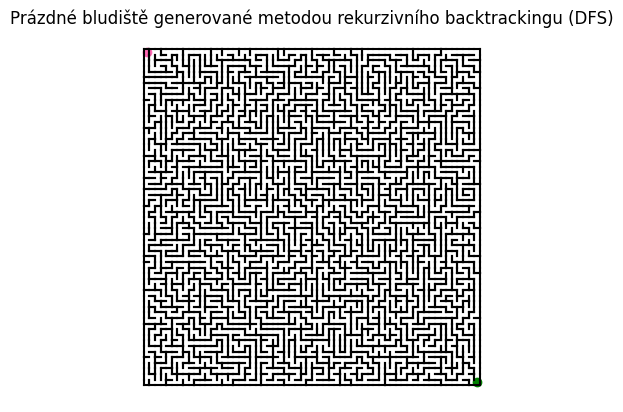

Maze drawing algorithm done! 1.96 s elapsed
End of the Test1


AssertionError: 

In [ ]:
def maze_bfs_search(aWalls, aStart, aGoal):
    from collections import deque
    aX_size = len(aWalls[0]) #aWalls je pole [y][x]
    aY_size = len(aWalls)
    aNodes_visited = [[False for _ in range(aX_size)] for _ in range(aY_size)]
    aNodes_visited[aStart[0]][aStart[1]] = True
    aParents = {} #záznam, odkud jsi přišel
    directions = [(0,-1), (-1, 0), (0, 1), (1, 0)] #list tuplů - nesmi se po vytvoreni jiz menit!
    #fronta
    aQueue = deque([aStart])
    while aQueue:
        (aY, aX) = aQueue.popleft()
        if (aY, aX) == aGoal:
            aBFS_path = []
            while current_cell != aStart:
                aBFS_path.append(current_cell)
                current_cell = aParents(current_cell) #podivej se, odkud jsi prisel
            return aBFS_path[::-1]
            child_cell = (current_cell[0] - 1, current_cell[1])
        
        for i, (dy, dx) in enumerate(directions):
            if directions != [(0,-1), (-1, 0), (0, 1), (1, 0)]:
                print("Directions vectors (y, x) does not make any sense - list of tupples not matching [(0,-1), (-1, 0), (0, 1), (1, 0)]!")
                assert False #pokud nekdo zadal zvenku zadal nesmysl
            if aWalls[aY][aX][i] == 0:
                    newY, newX  = aY + dy, aX + dx
                    if not aNodes_visited[newY][newX]:
                        aNodes_visited[newY][newX] == True
                        aParents[(newY, newX)] = (aY, aX)
                        aQueue.append((newY, newX))
    print("This maze can not be solved!")
    return -2
def main():
    myWalls = test1_generating_drawing_maze_recur_backtracking_60x60()
    myPath = maze_bfs_search(myWalls, (0,0), (15,15))
    print(myPath)
if __name__ == "__main__":
    main()




In [ ]:
# def maze_bfs_search(aWalls, aStart, aGoal):
#     from collections import deque
#     aY_size = len(aWalls[0])
#     aX_size = len(aWalls)

#     aNodes_visited = [aStart]
#     aQueue = deque()
#     aQueue.append(aStart)

#     aBFS_path = {}
#     aBFS_path[aStart] = None

#     while aQueue:
#         current_cell = aQueue.popleft()
#         aY_actual, aX_actual = aStart
#         if current_cell == aGoal:
#             break
        
#         for aY_actual, aX_actual in range(aWalls[0]), range(aWalls):
#             if aWalls[aY_actual][aX_actual][0] == 0: #and not aVisited_nodes[aY_actual][aX_actual - 1]: #da se jit doleva
#                 child_cell = (current_cell[0], current_cell[1] - 1)
#             elif aWalls[aY_actual][aX_actual][1] == 0: #and not aVisited_nodes[aY_actual + 1][aX_actual]: #da se jit nahoru
#                 child_cell = (current_cell[0] + 1, current_cell[1])
#             elif aWalls[aY_actual][aX_actual][2] == 0: #and not aVisited_nodes[aY_actual][aX_actual + 1]: #da se jit doprava
#                 child_cell = (current_cell[0], current_cell[1] + 1)
#             elif aWalls[aY_actual][aX_actual][3] == 0: #and not aVisited_nodes[aY_actual - 1][aX_actual]: #da se jit dolu
#                 child_cell = (current_cell[0] - 1, current_cell[1])
#             if child_cell in aNodes_visited:
#                 continue
#         path.append(child_cell)
#         aNodes_visited.append(child_cell)
#         bfsPath[child_cell] = current_cell
#     #return aVisited_nodes